<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab06_ceros_funciones_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Codigo Markdown:
Los numeras a, b, c y d tiene que ver con escritura en código Markdown y comandos de latex:

a. Escriba en pseudocódigo los pasos para aplicar el método de la bisección.

b. Realice la deducción del metodo de Newton-Rapshon, se recomienda escribir las ecuaciones en formato latex, para ello puede emplear las siguientes expresiones:

c. ¿Cuál es la diferencia del metodo de Newton-Rapson con respecto al de la secante?


d. Escriba en pseudocódigo los pasos para aplicar el método Punto Fijo.



Comentarios para escribir en latex

*   Entre simbolos \$ \$, puedes porner expresiones  puede poner expresiones, ejemplo:  $y = a_0 x^2 + b_1$  

*  Las funciones pueden ser definidas entre \\$,  poniendo un \\, antes de la funcion ejemplo: \\$ \\sinx \\$,   asi las funciones quedarian de esta manera :

> $\sin x$, $\tan x$, $\sec x$, $\sqrt{a} $, $\frac{a}{b}, \frac{df}{dt}$

* Puedes generar tambien escribir ecuaciones con la instrucción:

  \\begin{equation}

    \\sin x  
  
  \\end{equation}

Ejemplo:

  \begin{equation}
    \frac{df}{dx} = \sin x  
  \end{equation}



# 2. Ceros de funciones
*Encontrar* los ceros de $e^{x}-2= \cos(e^x-2)$ por diferentes metodos, bisection, newton-rapshon, punto fijo.





# 3. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si u es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguientes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```



1. Defina dos funciones, una para x y otra para y.

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y

```

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 regitros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 80 grados cada 5 grados.




In [3]:
#@title Punto 2. Raíz
#Como vamos a utilizar librerías entonces solo dedemos definir una función y su derivada

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
import sympy as sp

f = lambda x : (np.exp(x)) - 2 - (np.cos((np.exp(x)) - 2))
df = lambda x : (np.exp(x)) + (np.sin(np.exp(x) - 2)*((np.exp(x))))
x = np.linspace(-3,3,100)


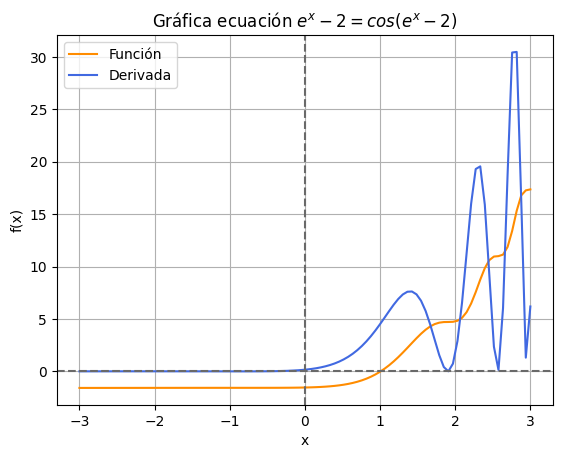

In [4]:
plt.plot(x, f(x), color = "darkorange", label = "Función")
plt.plot(x, df(x), color = "royalblue", label = "Derivada")
plt.title("Gráfica ecuación $e^{x} - 2 = cos(e^{x} - 2)$")
plt.axhline(0, color='dimgray', linestyle='--')
plt.axvline(0, color='dimgray', linestyle='--')
plt.ylabel("f(x)")
plt.xlabel("x")
plt.grid()
plt.legend()
plt.show()


In [5]:
#@title Método de bisección

a = -2.0
b = 2.0
root1 = optimize.bisect(f, a, b)
print(root1)

1.0076239716563578


In [6]:
#@title Método de la tangente

c = 3.0
root2 = optimize.newton(f, c, df)
print(root2)

1.0076239716581368


In [7]:
#@title Punto 3. Movimiento parabólico
#definimos parámetros iniciales

v_0 = 60                                                                        #m/s
alpha = np.pi                                                                   #ángulo de viento
theta = np.deg2rad(45)                                                          #angulo de lanzamiento en radianes
u = v_0/2                                                                       #rapidez del viento
b = 0.05                                                                        #coeficiente de fricción
g = 9.8                                                                         #aceleración de la gravedad m/s²

parametros = (theta, alpha, v_0, b, u, g)
print(parametros)

(0.7853981633974483, 3.141592653589793, 60, 0.05, 30.0, 9.8)


In [8]:
#@title 1. Vamos a definir las funciones para x y y

#posicion en x
def posicion_x(t, theta, alpha, v_0, b, u, g):
  x = (u*np.cos(alpha))*t  + ((((v_0*np.cos(theta)) - (u*np.cos(alpha)))*(1 - np.exp(-b*t)))/b)
  return x

def posicion_y(t, theta, alpha, v_0, b, u, g):
  y = ((((g/b) + v_0*np.sin(theta) - u*np.sin(alpha))*(1 - np.exp(-b*t)))/b) - (((g/b) - (u*np.sin(alpha)))*t)
  return y


In [9]:
#@title 5. Para hallar el tiempo de vuelo necesito utilizar un método para encontrar raíces, es decir para ver el valor donde y se hace 0
cero = optimize.bisect(posicion_y, 7, 9, args = parametros)
print(f"la posición  y se hace 0 en: {cero}")

la posición  y se hace 0 en: 8.11162702209731


In [10]:
#@title 2. Vamos a crear un linspace con los tiempos para nuestras funciones, evaluamos x y y en esos tiempos y creamos un dataframe
t = np.linspace(0, cero, 1000)
y = posicion_y(t, *parametros)
x = posicion_x(t, *parametros)

In [11]:
dicc={"x": x, "y":y, "t": t}
df = pd.DataFrame(dicc)
df

,x,y,t
0,0.000000,0.000000e+00,0.000000
1,0.344372,3.440987e-01,0.008120
2,0.688506,6.874118e-01,0.016239
3,1.032401,1.029940e+00,0.024359
4,1.376058,1.371682e+00,0.032479
...,...,...,...
995,239.011203,1.199722e+00,8.079148
996,239.160179,9.005785e-01,8.087268
997,239.308995,6.009099e-01,8.095388
998,239.457652,3.007170e-01,8.103507


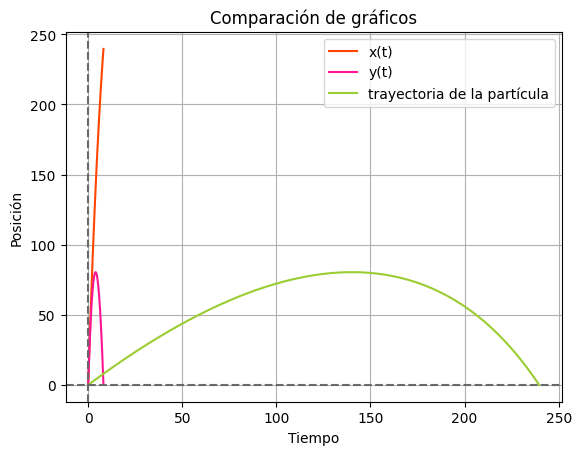

In [12]:
#@title 4. Gráfico de x y y en función del tiempo y la trayectoria de la partícula
plt.plot(df["t"], df["x"], color = "orangered", label = "x(t)")
plt.plot(df["t"], df["y"], color = "deeppink", label = "y(t)")
plt.plot(df["x"], df["y"], color = "yellowgreen", label = "trayectoria de la partícula")
plt.axhline(0, color = "dimgray", linestyle = "--")
plt.axvline(0, color = "dimgray", linestyle = "--")
plt.title("Comparación de gráficos")
plt.ylabel("Posición")
plt.xlabel("Tiempo")
plt.legend()
plt.grid()
plt.show()


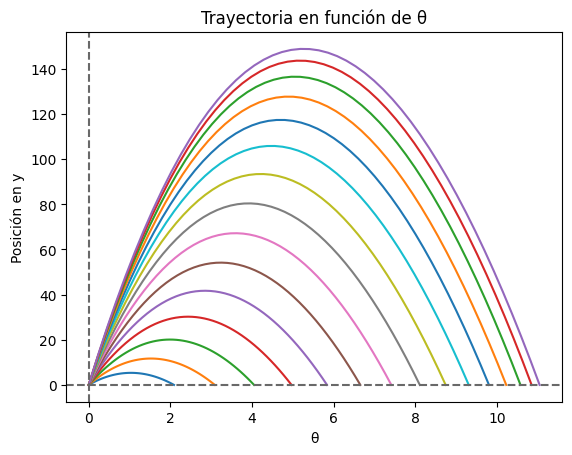

In [13]:
#@title Gráfico de la trayectoria en función de $\theta$
#definimos los angulos, un tiempo de vuelo nuevo para cada trayectoria y la trayectoria
angulos = np.arange(10, 85, 5)
angulos_nuevos = np.deg2rad(angulos)

for k in angulos_nuevos:
  tnuevo = optimize.bisect(posicion_y, 2, 12.5, args = (k, alpha, v_0, b, u, g))
  t_nuevo = np.linspace(0, tnuevo, 50)
  ynueva = posicion_y(t_nuevo, k, alpha, v_0, b, u, g)
  plt.plot(t_nuevo, ynueva)


plt.title("Trayectoria en función de θ")
plt.axhline(0, color = "dimgray", linestyle = "--")
plt.axvline(0, color = "dimgray", linestyle = "--")
plt.ylabel("Posición en y")
plt.xlabel("θ")
plt.show()


# 4. Fixed point methods.

When a new planet is discovered, there are different methods to estimate its physical properties. Many times is only possible to estimate either the planet mass or the planet radius and the other property has to be predicted through computer modelling.

If one has the planet mass, a very rough way to estimate its radius is to assume certain composition (mean density) and a homogeneous distribution (a very bad assumption!). For example, for the planet [Gliese 832c](http://es.wikipedia.org/wiki/Gliese_832_c) with a mass $M= 5.40 M_{\oplus}$, if we assume an earth-like composition, i.e. $\bar \rho_{\oplus} = 5520\ kg/m^3$, we obtain:

$$R_{g832c} = \left( \frac{3 M_{g832c}}{ 4 \pi \bar\rho_{\oplus} } \right)^{1/3} \approx 1.75 R_{\oplus}$$

That would be the planet radius if the composition where exactly equal to earth's.

A more realistic approach is assuming an internal one-layer density profile like:

$$\rho(r) = \rho_0 \exp\left( -\frac{r}{L} \right)$$

where $\rho_0$ is the density at planet centre and $L$ is a characteristic lenght depending on the composition. From numerical models of planet interiors, the estimated parameters for a planet of are $M= 5.40 M_{\oplus}$ are approximately $\rho_0 = 18000\ kg/m^3$ and $L = 6500\ km$.

Integrating over the planet volume, we obtain the total mass as

$$M = 4\pi \int_0^R \rho(r)r^2dr$$

This is a function of the mass in terms of the planet radius.

Solving the equation $M(R) = M_{g832c}$ it would be possible to find a more realistic planet radius. However when using numerical models, it is not possible to approach the solution from the left side as a negative mass makes no sense.

In [16]:
#@title Primero debemos encontrar nuestra funcion M(R)
#eso lo haremos resolviendo la integral por medio de sympy, debemos definir nuestras variables dadas por las fórmulas anteriores
r = sp.Symbol("r")
L = sp.Symbol("L")
rho_0 = sp.Symbol("rho_0")
R = sp.Symbol("R")

#definimos una función lambda para rho
rho = lambda r: rho_0*sp.exp(-r/L)

#y la integral la calculamos con sp.integrate
M = sp.integrate((r**2)*rho(r), (r, 0, R))
M

2*L**3*rho_0 + (-2*L**3*rho_0 - 2*L**2*R*rho_0 - L*R**2*rho_0)*exp(-R/L)

In [29]:

f = sp.lambdify([L, rho_0, R], I, "numpy")
funcion = lambda R: 4*np.pi*f(650000, 18000, R) - 5.40

<function __main__.<lambda>(R)>

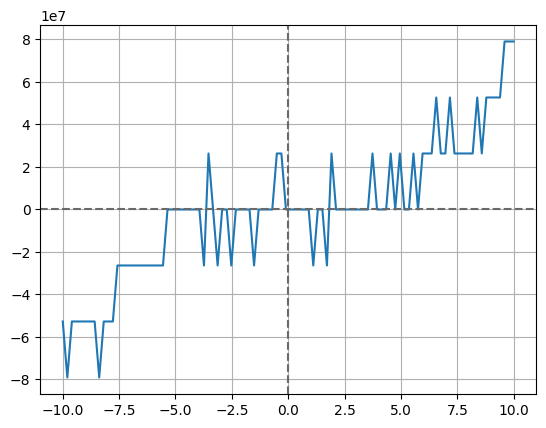

In [49]:
#@title Utilizando la función sympy.lambdify convertiremos I en una función que se puede evaluar y para graficarlo
Radios = np.linspace(-10, 10, 100)
plt.plot(Radios, funcion(Radios))
plt.axhline(0, color = "dimgray", linestyle = "--")
plt.axvline(0, color = "dimgray", linestyle = "--")
plt.grid()
plt.show()


In [43]:
root = optimize.bisect(funcion, -20, 20)
root

4.212582648614216


# 5. Construir un fractal empleando el metodo de Newton-Raphson,
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)}
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}



```
import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h
  

a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)
        if( abs(Z-Z_0)<= eps):
          break           
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16      
      image.putpixel((x,y), (r,g,b) )

plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)
```

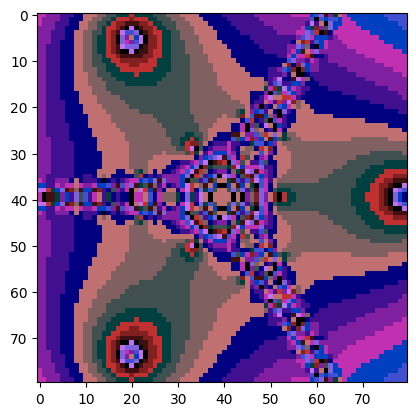

In [22]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
# Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

# Definicion  la funcion y las derivada
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h


a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)

      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)
        if( abs(Z-Z_0)<= eps):
          break
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      image.putpixel((x,y), (r,g,b) )

plt.imshow(image)
# plt.xlim(400, 600)
# plt.ylim(400, 523)